In [1]:
import pandas as pd
from matplotlib import pyplot as plt



In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
digits['data'].shape


(1797, 64)

In [4]:
digits['target'].shape


(1797,)

[Text(0.5, 1.0, 'True digit: 1')]

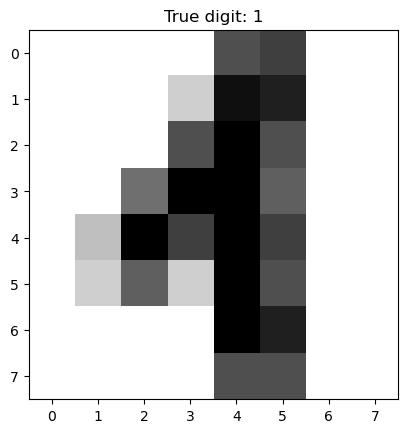

In [5]:
fig, ax = plt.subplots(1)
i = 200

ax.imshow(digits['data'][i].reshape(8, 8), cmap = plt.cm.binary)
ax.set(title = "True digit: " + str(digits['target'][i]))

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

m = LogisticRegression(random_state = 0, solver = "liblinear")
cross_val_score(m, X_train, y_train, cv = 10).mean()

0.951763405196241

In [8]:
m.fit(X_train, y_train)
y_train_pred = m.predict(X_train)
y_train_pred

array([4, 2, 5, ..., 1, 3, 0])

In [9]:
m.score(X_test, y_test)


0.9666666666666667

In [10]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(solver = "lbfgs",
                   alpha = 1e-5, 
                   hidden_layer_sizes = (100, 100, 100, 100),
                   random_state = 0)

nn.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(100, 100, 100, 100),
              random_state=0, solver='lbfgs')

In [11]:
nn.score(X_test, y_test)


0.9733333333333334

In [12]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(n_estimators = 1000)

In [13]:
RFC.fit(X_train, y_train)
RFC.score(X_test, y_test)

0.98

In [20]:
# This is a cell for reading the digit files, storing them into np arrays.

import numpy as np
import glob
import os

# 1. Specify the folder containing your .txt files
folder = "/Users/jaeuchoi/Downloads/mnist-model/sample-data"  # Change to your folder path

# 2. Get a list of all .txt files in the folder
txt_files = glob.glob(os.path.join(folder, "*.txt"))

# Prepare a list to hold each flattened array, and their filenames in same order
flattened_arrays = []
filenames = []


def get_filename_without_extension(path):
  """
  Returns the base filename without the extension from a given path.
  """
  filename = os.path.basename(path)
  name_without_extension, extension = os.path.splitext(filename)
  return name_without_extension



# 3. Loop over each .txt file, load it, flatten (reshape to single row)
for file_path in txt_files:
    # Load the data as a NumPy array
    data = np.loadtxt(file_path)
    
    # Reshape to a single row (or you could use data.flatten())
    # data.reshape(1, -1) ensures it becomes shape (1, num_elements)
    data_row = data.reshape(1, -1)
    
    # Collect the flattened row
    flattened_arrays.append(data_row)
    
    filenames.append(get_filename_without_extension(file_path))

# 4. Stack all rows to form one 2D array
# If each file's data has shape (1, n), then combined_data will have shape (num_files, n)
combined_data = np.vstack(flattened_arrays)

"""
# 5. Save the final 2D array to a text file
# Each row corresponds to a single text file
output_file = "combined_data.txt"
np.savetxt(output_file, combined_data, delimiter=",", fmt="%.6f")

print(f"Combined data saved to {output_file}. Shape of combined data:", combined_data.shape)
"""
print(f'{combined_data[1]} and {filenames[1]}')

[ 0.  0.  7. 13. 15.  5.  0.  0.  0.  0.  8. 16. 16. 12.  0.  0.  0.  0.
  7. 16. 15.  3.  0.  0.  0.  0.  6. 16.  5.  0.  0.  0.  0.  0.  5. 16.
  2.  0.  0.  0.  0.  0.  8. 16.  6.  0.  0.  0.  0.  0. 12. 12. 13.  0.
  0.  0.  0.  0.  5. 13. 10.  0.  0.  0.] and 129


43
 Predictions: 7 
 [7] 
 [7]


[Text(0.5, 1.0, 'True digit: 43')]

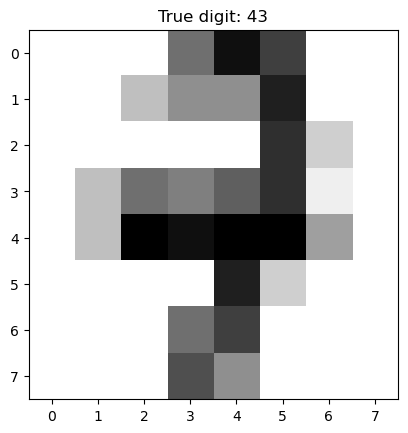

In [82]:
# This is a cell for using our trained model to predict number from digit files.

# choose random number from np.array of numbers
import random

index = random.randint(1, len(combined_data))
digit_data = combined_data[[index]]
digit_number = filenames[index]

# debugging
# print(f'{digit_data} and {digit_number}')

# Predict!

print(f'{digit_number}\n Predictions: {m.predict(digit_data)[0]} \n {nn.predict(digit_data)} \n {RFC.predict(digit_data)}')

# drawing plot of digit data
fig, ax = plt.subplots(1)
i = 200

ax.imshow(digit_data.reshape(8, 8), cmap = plt.cm.binary)
ax.set(title = "True digit: " + str(digit_number))

In [85]:

def digit_predictor(digit_data, digit_number):
    '''
    Function that actually predicts digit with digit data and compares with its true value.
    
    Accepts:
    digit data of (64,) (numpy 1-D array)
    true number of that digit_data (Int)
    
    Returns:
    prints predicted digit of several models and draws plot of the digit data
    '''
    
    # Change 1-D array to 2-D array with single row
    digit_data = digit_data.reshape(1,-1)

    # Predict!

    print(f'Predictions:\n1. Logistic Regression: {m.predict(digit_data)[0]}\n2. Neural Network: {nn.predict(digit_data)[0]}\n3. Random Forest Classifier: {RFC.predict(digit_data)[0]}')

    # drawing plot of digit data
    fig, ax = plt.subplots(1)
    i = 200

    ax.imshow(digit_data.reshape(8, 8), cmap = plt.cm.binary)
    ax.set(title = "True digit: " + str(digit_number))


 Predictions: [3] 
 [8] 
 [8]


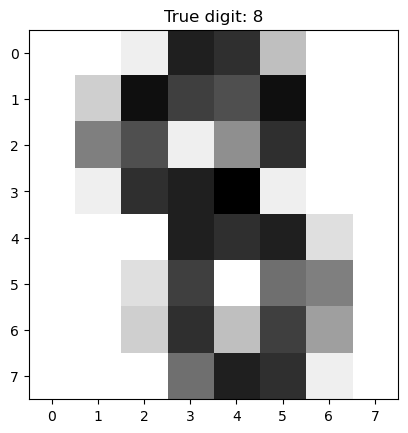

In [68]:
i = random.randint(1, len(digits['data']))
digit_predictor(digits['data'][i], digits['target'][i])

In [75]:
import numpy as np
from PIL import Image

def image_to_8x8_array(filepath):
    """
    Convert a handwritten digit image (at 'filepath') into an 8x8 grayscale
    array where 0 = white and 16 = black.
    """
    # 1. Load image and convert to grayscale (0=black, 255=white by default)
    img = Image.open(filepath).convert("L")
    
    # 2. Resize to 8x8
    img = img.resize((8, 8), resample=1) # resample = 1 means downscaling uses LANCZOS algorithm
    
    # 3. Convert to a NumPy array of shape (8,8), range 0–255
    arr = np.array(img)
    
    # 4. Invert if you want 0 for white, 255 for black
    #    Since by default 0=black and 255=white in Pillow,
    #    we flip it so 0=white and 255=black:
    arr_inverted = 255 - arr
    
    # 5. Scale from [0..255] to [0..16]
    #    Using integer division (floor) for discrete levels
    arr_8x8 = arr_inverted // 16  # integer in [0..16]

    return arr_8x8




In [77]:
# Example usage:

file_path = "8.png"  # replace with your actual image file
digit_array = image_to_8x8_array(file_path)
print(digit_array)
print("Array shape:", digit_array.shape)
print("Unique values:", np.unique(digit_array))

[[ 0  0  1  7  6  0  0  0]
 [ 0  0 10  7  8  9  0  0]
 [ 0  1 12  0  0 12  0  0]
 [ 0  0  6 11 11  5  0  0]
 [ 0  0  9  6  6  9  0  0]
 [ 0  3 12  0  0 12  1  0]
 [ 0  0 11  7  8 11  0  0]
 [ 0  0  1  7  7  1  0  0]]
Array shape: (8, 8)
Unique values: [ 0  1  3  5  6  7  8  9 10 11 12]


Predictions:
1. Logistic Regression: 8
2. Neural Network: 8
3. Random Forest Classifier: 8


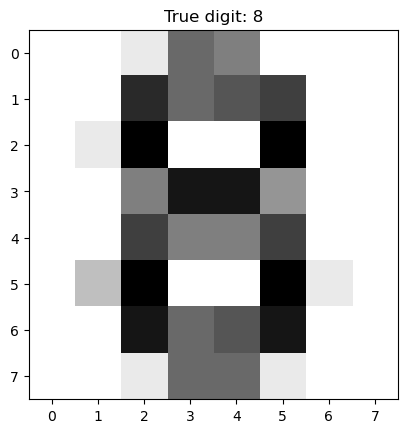

In [86]:
digit_array = digit_array.reshape(1,-1)
digit_predictor(digit_array, 8)

In [87]:
import pickle

# Save each trained model
with open("logistic_regression_model.pkl", "wb") as f:
    pickle.dump(m, f)

with open("neural_network_model.pkl", "wb") as f:
    pickle.dump(nn, f)

with open("random_forest_model.pkl", "wb") as f:
    pickle.dump(RFC, f)